# What is Machine Learning?

## Supervised learning for numerical target values
### Prediction of the house prices

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
# Load the dataset
df = pd.read_csv('Data/kc_final.csv' ,sep=";")
df


In [7]:
# Select the input and output variables
X = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values

In [8]:
# Create and fit the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

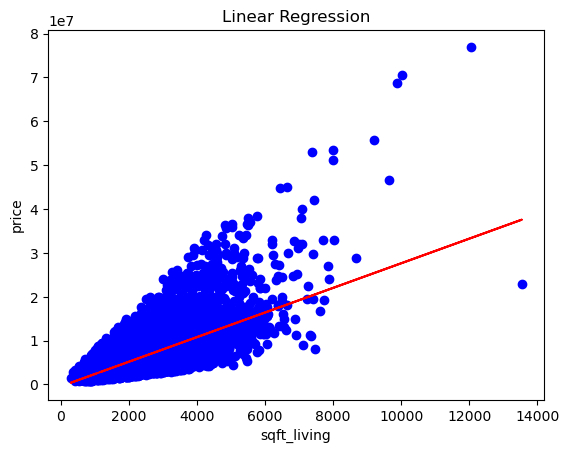

In [9]:
# Make predictions
y_pred = regressor.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

## Supervised Learning for categorical target values
### Prediction of the surviving passengers

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [22]:
# Load the dataset
data = pd.read_csv('Data/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
# Encode categorical variable 'Sex' using one-hot encoding
data = pd.get_dummies(data, columns=['Sex'])

In [14]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

In [15]:
# Select features (X) and target (y)
X = data[['Pclass', 'Age', 'Sex_female']]  # Include the encoded 'Sex_female' column
y = data['Survived']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=51,stratify=y)

# Create a decision tree classifier with gain ratio (entropy) and pruning
clf = DecisionTreeClassifier(random_state=51, min_samples_leaf=20, ccp_alpha=0.01, criterion='entropy')  # Use 'entropy' for gain ratio


In [17]:
# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7777777777777778
Confusion Matrix:
[[52  3]
 [17 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        55
           1       0.86      0.51      0.64        35

    accuracy                           0.78        90
   macro avg       0.81      0.73      0.74        90
weighted avg       0.79      0.78      0.76        90



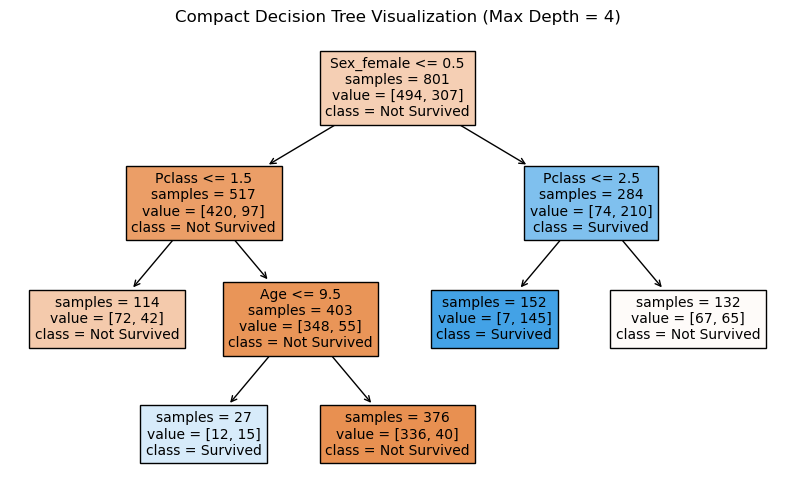

In [18]:
# Visualize the compact decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True,feature_names=X.columns, class_names=['Not Survived', 'Survived'], fontsize=10, impurity=False)  # Provide an empty list for feature names
plt.title("Compact Decision Tree Visualization (Max Depth = 4)")
plt.show()